## Importing The Packages

In [13]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [14]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0XQ_cH6t2fRYQS16dxr79_sDSvG0KeVeqF1aER71fcwL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlender-donotdelete-pr-rlqc5g1f9xmupg'
object_key = 'loan_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 13)

## Handle The Missing values

In [16]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoApplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Treating The Null Value

In [17]:
# We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [18]:

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [19]:
numerical_features

Index(['ApplicantIncome', 'CoApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [20]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [22]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoApplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
# Now the null value is retreated

## Handling Categorical Values

In [24]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [27]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [29]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [30]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [31]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [33]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [34]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [35]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [36]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [37]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [38]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [39]:
df['CoApplicantIncome']=df['CoApplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [40]:
# dummy columns are created for the categories in Loan_ID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [42]:
df.drop(columns = 'Loan_ID', inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1


## Balancing The Dataset

In [54]:
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn==0.9.0

     |████████████████████████████████| 199 kB 10.3 MB/s eta 0:00:01


In [55]:
from imblearn.combine import SMOTETomek

In [56]:
smote = SMOTETomek(0.90)

In [57]:
#dividing the dataset into dependent and independent y and x respectively

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [58]:
#creating the new x and y for balance data
x_bal,y_bal = smote.fit_resample(x,y)

In [59]:
#printing the value before and after balancing 
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    359
0    316
Name: Loan_Status, dtype: int64


## Scaling The Data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [62]:
x_bal = pd.DataFrame(x_bal)

In [63]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,120,360,1,2
1,1,1,1,1,0,4583,1508,128,360,1,0
2,1,1,0,1,1,3000,0,66,360,1,2
3,1,1,0,0,0,2583,2358,120,360,1,2
4,1,0,0,1,0,6000,0,141,360,1,2


## Splitting Data Into Train And Test

In [64]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(411, 11)
(411,)
(203, 11)
(203,)


# IBM Deployment

In [6]:
!pip install ibm_watson_machine_learning

In [84]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"pyVXLiJhc4l4FVqthTGy4uLZO4jvkPUNgPbhRBzKX3lL"
}

client = APIClient(wml_credentials)

In [85]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [86]:
space_uid = guid_from_space_name(client, 'SL')
print("Space UID = " + space_uid)

Space UID = 82bcc9b5-049b-4e40-a844-371e64c85168


In [90]:
client.set.default_space(space_uid)

'SUCCESS'

In [12]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

## MODELLING

## Xgboost Model

In [67]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [68]:
model = GradientBoostingClassifier() 

In [69]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [70]:
yPred = model.predict(x_test)

In [71]:
#confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test ,yPred) )

Confusion matrix
[[ 32  40]
 [ 10 121]]


In [72]:
#Classification report
print("Classification report")
print(classification_report (y_test, yPred))

Classification report
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        72
           1       0.75      0.92      0.83       131

    accuracy                           0.75       203
   macro avg       0.76      0.68      0.70       203
weighted avg       0.76      0.75      0.73       203



In [73]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [74]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7536945812807881
Training accuracy:  0.9075425790754258


In [75]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,32,40
1,10,121


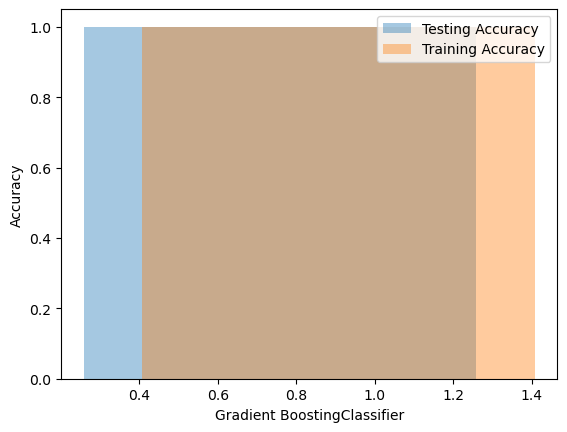

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(accuracy_score(y_test,y_pred), label = 'Testing Accuracy')
sns.distplot(accuracy_score(y_train,y_pred1), label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('Gradient BoostingClassifier')
plt.ylabel('Accuracy')
plt.show()

## Model Saving

In [76]:
import joblib
joblib.dump(model,'Forest.pkl')

['Forest.pkl']

## Saving and Deploying The model

In [77]:
import sklearn
sklearn.__version__

'1.0.2'

In [91]:
software_space_uid = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_space_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [92]:
MODEL_NAME = 'Model_building'
DEPLOYMENT_NAME = 'Smart-Lender'
DEMO_MODEL = model

In [94]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid 
}

In [95]:
model_details = client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=y_pred1, 
    training_target=y_train
)

In [96]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Loan_Status',
  'schemas': {'input': [{'fields': [{'name': 'f1', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-19T15:34:02.738Z',
  'id': '39ea57fd-d67a-4fc5-82c3-eb0e9cd57adc',
  'modified_at': '2022-11-19T15:34:05.825Z',
  'name': 'Model_building',
  'owner': 'IBMid-667000FLVJ',
  'resource_key': '1f58148d-afb5-4cc3-9a01-14bbe2168c15',
  'space_id': '82bcc9b5-049b-4e40-a844-371e64c85168'},
 'system': {'warnings': []}}

In [97]:
model_id = client.repository.get_model_id(model_details)
model_id

'39ea57fd-d67a-4fc5-82c3-eb0e9cd57adc'

In [98]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [99]:
# Deployment
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '39ea57fd-d67a-4fc5-82c3-eb0e9cd57adc' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d60f93c0-8a72-496b-970c-991cfe928161'
------------------------------------------------------------------------------------------------


